In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [47]:
credit_data_orig = pd.read_csv("german_credit.csv")


credit_data_orig.shape

print(credit_data_orig)

     default                               account_check_status  \
0          0                                             < 0 DM   
1          1                                  0 <= ... < 200 DM   
2          0                                no checking account   
3          0                                             < 0 DM   
4          1                                             < 0 DM   
5          0                                no checking account   
6          0                                no checking account   
7          0                                  0 <= ... < 200 DM   
8          0                                no checking account   
9          1                                  0 <= ... < 200 DM   
10         1                                  0 <= ... < 200 DM   
11         1                                             < 0 DM   
12         0                                  0 <= ... < 200 DM   
13         1                                             < 0 D

In [28]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
credit_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [48]:
credit_data = pd.get_dummies(credit_data_orig, prefix=[
    'credit_history', 'account_check_status'
 ,'purpose','savings','present_emp_since',
    'personal_status_sex','property',
'other_installment_plans','housing','job',
    'foreign_worker','telephone','credits_this_bank' ])
X = credit_data.drop("default", axis = 1)
y = credit_data["default"]



In [49]:
from sklearn.model_selection import train_test_split
test_size = 0.50
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)


In [50]:
# Lets build a Ensemble model but need to modify the dataset first
# configure bootstrap
from sklearn.utils import resample
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
n_iterations = 200        # Number of bootstrap samples to create
n_size = int(len(credit_data) * 0.50)    # picking only 50 % of the given data in every bootstrap sample
values = credit_data.values
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(X_train, y_train)
    # pnly the last column
    # evaluate model
	predictions = model.predict(X_test)
    # except the last column 
	score = accuracy_score(y_test, predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.656
0.632
0.62
0.654
0.66
0.646
0.654
0.656
0.648
0.64
0.674
0.652
0.642
0.65
0.636
0.656
0.652
0.658
0.65
0.66
0.646
0.664
0.65
0.646
0.662
0.662
0.652
0.642
0.67
0.678
0.654
0.652
0.674
0.66
0.652
0.646
0.638
0.644
0.628
0.662
0.646
0.65
0.664
0.662
0.67
0.644
0.682
0.66
0.666
0.648
0.654
0.664
0.642
0.64
0.666
0.656
0.638
0.666
0.67
0.648
0.664
0.64
0.646
0.644
0.666
0.648
0.646
0.668
0.658
0.662
0.658
0.648
0.664
0.64
0.66
0.662
0.642
0.666
0.654
0.652
0.658
0.652
0.66
0.662
0.656
0.654
0.652
0.662
0.66
0.668
0.664
0.644
0.654
0.662
0.654
0.658
0.656
0.664
0.642
0.668
0.668
0.66
0.654
0.662
0.654
0.646
0.648
0.632
0.648
0.662
0.648
0.674
0.648
0.634
0.662
0.638
0.654
0.668
0.668
0.652
0.648
0.648
0.646
0.644
0.64
0.654
0.648
0.654
0.642
0.646
0.652
0.646
0.642
0.66
0.672
0.662
0.658
0.644
0.658
0.66
0.666
0.646
0.654
0.656
0.646
0.65
0.684
0.656
0.658
0.656
0.672
0.658
0.66
0.65
0.678
0.66
0.642
0.672
0.652
0.652
0.64
0.656
0.64
0.672
0.654
0.664
0.65
0.666
0.64
0.64
0.672
0.664


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [51]:
# Print Shape of model data
# credit_data = pd.get_dummies(credit_data, prefix=[
#     'credit_history', 'account_check_status'
#  ,'purpose','savings','present_emp_since',
#     'personal_status_sex','property',
# 'other_installment_plans','housing','job',
#     'foreign_worker','telephone','credits_this_bank'])
credit_data_orig.shape

(1000, 21)

### Check for highly correlated variables but don't required any treatment for this use case

In [52]:
credit_data_orig.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


### Drop the original variables which are converted to dummy

In [54]:
credit_data_orig.drop([
    'credit_history', 'account_check_status'
 ,'purpose','savings','present_emp_since',
    'personal_status_sex','property',
'other_installment_plans','housing','job',
    'foreign_worker','telephone','credits_this_bank' ], axis =1)

,default,duration_in_month,credit_amount,installment_as_income_perc,other_debtors,present_res_since,age,people_under_maintenance
0,0,6,1169,4,none,4,67,1
1,1,48,5951,2,none,2,22,1
2,0,12,2096,2,none,3,49,2
3,0,42,7882,2,guarantor,4,45,2
4,1,24,4870,3,none,4,53,2
5,0,36,9055,2,none,4,35,2
6,0,24,2835,3,none,4,53,1
7,0,36,6948,2,none,2,35,1
8,0,12,3059,2,none,4,61,1
9,1,30,5234,4,none,2,28,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [55]:
X = credit_data.drop("default", axis = 1)
y = credit_data["default"]

credit_data

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,credit_history_0 <= ... < 200 DM,credit_history_< 0 DM,...,job_own,job_rent,foreign_worker_management/ self-employed/ highly qualified employee/ officer,foreign_worker_skilled employee / official,foreign_worker_unemployed/ unskilled - non-resident,foreign_worker_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",credits_this_bank_no,credits_this_bank_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1
5,0,36,9055,2,4,35,1,2,0,0,...,0,0,0,0,0,1,0,1,0,1
6,0,24,2835,3,4,53,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
7,0,36,6948,2,2,35,1,1,1,0,...,0,1,1,0,0,0,0,1,0,1
8,0,12,3059,2,4,61,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
9,1,30,5234,4,2,28,2,1,1,0,...,1,0,1,0,0,0,1,0,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [58]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=4,random_state=9999,n_jobs=2 )



Rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)



### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

ypred1=Rf_model.predict(X_test)

acc1=metrics.accuracy_score(y_test,ypred1)

print(acc1)


cm=metrics.confusion_matrix(y_test,ypred1)
print(cm)


0.73
[[350   7]
 [128  15]]


### Q6 Show the list of the features importance( 1 Marks)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
# Use below values
num_folds = 10
seed = 77

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
train_set, test_set, train_labels, test_labels = train_test_split(
    X_std, y, test_size=0.30, random_state=2)





0.693000 (0.023558)


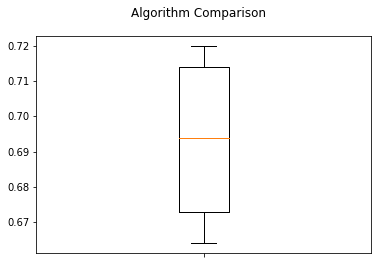

In [77]:
#Validate the Random Forest model build above using k fold 4
from sklearn import model_selection
models = []
models.append(('RandomForest', Rf_model))

# evaluate each model in turn
results = []
# names = []
scoring = 'accuracy'

kfold = model_selection.KFold(n_splits=4,random_state=2)
cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
results.append(cv_results)
# names.append(name)
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [78]:
#Calculate Mean score
cv_results.mean()

0.6930000000000001

In [0]:
# Calculate score standard deviation using std()

In [79]:
cv_results.std()

0.02355843797877946

# Q8 Print the confusion matrix( 1 Marks)

In [80]:
cm=metrics.confusion_matrix(y_test,ypred1)
print(cm)

[[350   7]
 [128  15]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [84]:
Rf_acc=metrics.accuracy_score(y_test, ypred1)
print(Rf_acc)

0.73


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [88]:
#Hint: Use roc_curve
metrics.roc_curve(y_test, ypred1)



(array([0.        , 0.01960784, 1.        ]),
 array([0.       , 0.1048951, 1.       ]),
 array([2, 1, 0], dtype=int64))

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
